In [ ]:
import pandas as pd
import re, string
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carissa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Carissa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('buruh_tweets_202112.csv')
df.head()

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


In [ ]:
slangs = {'gan': 'juragan', 
            'yg': 'yang', 
            'dgn': 'dengan',
            'kalo': 'kalau', 
            'pp': 'pulang pergi', 
            'kl': 'kalau',
            'klau': 'kalau',
            'jg': 'juga',
            'emg': 'memang',
            'knp': 'kenapa',
            'skrg': 'sekarang',
            'dmn': 'dimana',
            'bpk': 'bapak',
            'sdh': 'sudah',
            'uda': 'sudah',
            'jd': 'jadi',
            'blm': 'belum',
            'mlh': 'malah',
            'ktnya': 'katanya',
            'aja': 'saja',
            'sj': 'saja',
            'byk': 'banyak',
            'bnyk': 'banyak',
            'adl': 'adalah',
            'adlh': 'adalah',
            'spt': 'seperti',
            'sprti': 'seperti',
            'ato': 'atau',
            'pdhl': 'padahal',
            'ga': 'tidak',
            'gak': 'tidak',
            'tdk': 'tidak',
            'dr': 'dari',
            'dri': 'dari',
            'tp': 'tapi',
            'sy': 'saya',
            'thn': 'tahun',
            'krn': 'karena',
            'blh': 'boleh',
            'bgmn': 'bagaimana',
            'sgl': 'segala',
            'td': 'tadi',
            'dpt': 'dapat',
            'pda': 'pada',
            'crita': 'cerita',
            'sdg': 'sedang',
            'sampe': 'sampai',
            'lmyn': 'lumayan',
            'jgn': 'jangan',
            'mcm': 'macam',
            'klian': 'kalian',
            'blg': 'bilang',
        }

def tokenizing(text):
    text_tokens = word_tokenize(text)
    return text_tokens

def remove_slang_in_sentence(sentence: string):
    tokenized = tokenizing(sentence)
    for i, t in enumerate(tokenized):
        if t in slangs.keys():
            sentence = sentence.replace(t, slangs[t])
    return sentence

def case_folding(text):
    # Lowercasing all characters
    text = text.lower()

    # text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    text = re.sub("(\d+)|(/.+/)|(@\w+)|(\S*http\S+)", "", text)

    # Remove word contains number
    # text = re.sub(r"\d+", "", text)

    # Remove any single character
    # text = re.sub(r"/.+/", "", text)

    # Remove username tags
    # text = re.sub(r"@\w+", "", text)

    # Remove links
    # text = re.sub(r"\S*http\S+", "", text)

    # Remove punctuations
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

    # Remove whitespaces
    text = text.rstrip().lstrip()
    
    # Remove slangs before tokenized (there are some slangs that will be replaced with more than 1 word)
    text = remove_slang_in_sentence(text)
    return tokenizing(text)

def remove_stopwords(tokenized_sentence):
    stopwords_engine = StopWordRemoverFactory()
    stopwords = stopwords_engine.get_stop_words()
    result = []
    for word in tokenized_sentence:
        if word not in stopwords:
            result.append(word)
    return result

def stemming(word_list):
    engine = StemmerFactory()
    stemmer = engine.create_stemmer()
    stemmed_words = [stemmer.stem(word) for word in word_list]
    return stemmed_words

def stemming_sentence(sentence):
    engine = StemmerFactory()
    stemmer = engine.create_stemmer()
    stemmed_sentence = stemmer.stem(sentence)
    return stemmed_sentence


In [ ]:
hasil = [case_folding(item) for item in df['tweet']]

# hasil = [remove_stopwords(item) for item in hasil]
hasil = [' '.join(remove_stopwords(item)) for item in hasil]

# hasil = [stemming(item) for item in hasil]
hasil = [stemming_sentence(item) for item in hasil]

df['clean_tweet'] = hasil
df.head()


,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688,sesuai sepakat buruh tangerang raya tolak teta...
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978,demo buruh jubel izin terang benderang
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497,demo buruh rentan tunggang provokator ayo disi...
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896,buruh pulang pergi kemarin demo tuh pasal poli...
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958,beri buruh upah kering keringat hr abu yu la


In [ ]:
def char_frequency(data):
    bin_range = np.arange(0, 260, 10)
    char_freq = data['clean_tweet'].str.len()
    char_freq.hist(bins=bin_range)
    descriptive_analysis(char_freq)
    plt.show()

def word_length(data):
    bin_range = np.arange(0, 50)
    word_freq = data['clean_tweet'].str.split().map(lambda x: len(x))
    word_freq.hist(bins=bin_range)
    descriptive_analysis(word_freq)
    plt.show()

def mean_word_length(data):
    mean_length = data['clean_tweet'].str.split().apply(lambda x: [len(i) for i in x])
    mean_length = mean_length.map(lambda x: np.mean(x))
    mean_length.hist()
    descriptive_analysis(mean_length)
    plt.show()

def word_frequency(data):
    tweet_data = data['clean_tweet'].apply(lambda x: tokenizing(str(x)))
    tweets = [word for tweet in tweet_data for word in tweet]
    fqdist = FreqDist(tweets)
    # most_common_words = fqdist.most_common(50)
    fqdist.plot(20, cumulative=False)
    plt.show()

def bi_diagram(data):
    tweet_data = data['clean_tweet'].apply(lambda x: tokenizing(str(x)))
    tweets = [word for tweet in tweet_data for word in tweet]
    result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
    print(result)

def descriptive_analysis(series):
    df_series = pd.DataFrame(series)
    print(f"Describe : {df_series.describe()}")
    print(f"Skewness : {df_series.skew()}")


Describe :        clean_tweet
count     1000.000
mean        78.283
std         46.632
min          5.000
25%         42.000
50%         66.000
75%        107.250
max        256.000
Skewness : clean_tweet    0.901066
dtype: float64


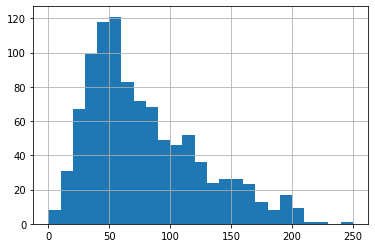

Describe :        clean_tweet
count  1000.000000
mean     12.583000
std       7.354672
min       1.000000
25%       7.000000
50%      11.000000
75%      17.000000
max      42.000000
Skewness : clean_tweet    0.932278
dtype: float64


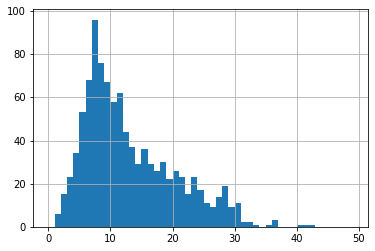

Describe :        clean_tweet
count  1000.000000
mean      5.306875
std       0.763118
min       3.000000
25%       4.800000
50%       5.230769
75%       5.694231
max      11.500000
Skewness : clean_tweet    1.382022
dtype: float64


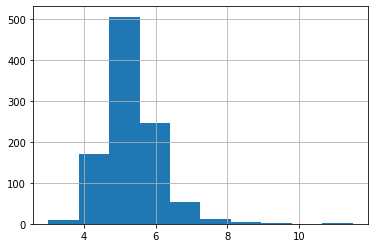

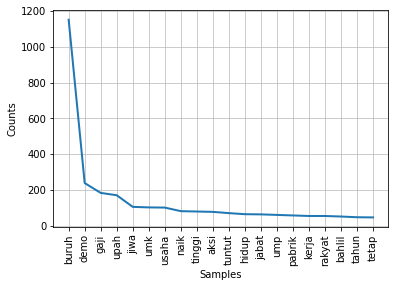

In [ ]:
char_frequency(df)
word_length(df)
mean_word_length(df)
word_frequency(df)

In [ ]:
bi_diagram(df)

(demo, buruh)       103
(buruh, demo)        58
(buruh, pabrik)      38
(upah, tinggi)       33
(buruh, jiwa)        30
(upah, buruh)        28
(serikat, buruh)     28
(tuntut, upah)       25
(kaum, buruh)        24
(buruh, buruh)       23
(naik, upah)         23
(gaji, buruh)        21
(jiwa, tuntut)       18
(upah, minimum)      17
(buruh, tuntut)      17
(buruh, tani)        17
(aksi, buruh)        16
(buruh, upah)        16
(tetap, ump)         16
(umk, buruh)         15
dtype: int64


# Analisis
- Dari data distribusi frekuensi jumlah karakter per data, terlihat distribusi terbanyak berada pada 20-80 karakter per tweet, dengan tweet yang memiliki panjang di atas 120 karakter tidak lebih dari 50 tweet.
- Dari data distribusi frekuensi jumlah kata per data, terlihat bahwa distribusi terbanyak berada pada 6-11 kata per tweet, dan jumlah tweet di bawah 20 kata dan di atas 10 kata, memiliki jumlah yang lumayan banyak.
- Dari data distribusi frekuensi panjang kata rata-rata, terlihat distribusi terbanyak berada pada 5-6 karakter per tweet.
- Dari data distribusi frekuensi data, terlihat bahwa kata 'buruh' berada pada urutan teratas, sehingga dapat disimpulkan bahwa keseluruhan tweet adalah tentang buruh yang melakukan demo mengenai gaji dan upah.
- Dari hasil bi-gram, menunjukkan bahwa keseluruhan tweet adalah membahas tentang demo buruh yang menuntut mengenai kenaikan gaji dan upah minimum.